<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/Breast_Cancer_ipynbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Breast_Cancer.csv')

# Exploring Data

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
data.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [5]:
data.sample()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1831,33,White,Single,T2,N1,IIB,Moderately differentiated,2,Regional,45,Positive,Negative,14,2,105,Alive


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
data.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [8]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [9]:
data.shape

(4024, 16)

In [10]:
data["Estrogen Status"]

,Estrogen Status
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
4019,Positive
4020,Positive
4021,Positive
4022,Positive


In [23]:
data.RNE=data.rename(columns={"Reginol Node Examined": "RNE"}, inplace=True)


In [24]:
data.RNP=data.rename(columns={"Regional Node Positive": "RNP"}, inplace=True)
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,RNE,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,None,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,None,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,None,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,None,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,None,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,None,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,None,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,None,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,None,1,72,Alive


In [19]:
print(data.columns.tolist())


['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'RNE', 'Reginol Node Positive', 'Survival Months', 'Status']


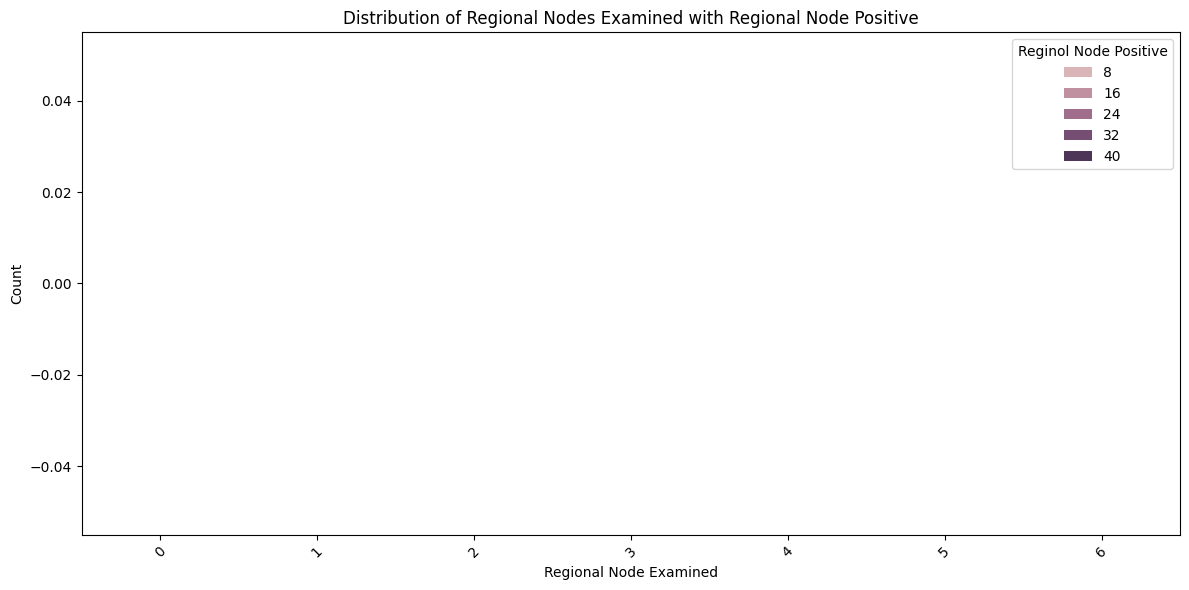

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="RNE", hue="Reginol Node Positive")
plt.xlabel("Regional Node Examined")
plt.ylabel("Count")
plt.title("Distribution of Regional Nodes Examined with Regional Node Positive")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Cleaning Data

In [26]:
data


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,RNE,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,None,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,None,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,None,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,None,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,None,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,None,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,None,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,None,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,None,1,72,Alive


In [27]:
data.drop(['differentiate', 'Race','6th Stage'], axis=1 , inplace = True )
data

,Age,Marital Status,T Stage,N Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,RNE,Reginol Node Positive,Survival Months,Status
0,68,Married,T1,N1,3,Regional,4,Positive,Positive,None,1,60,Alive
1,50,Married,T2,N2,2,Regional,35,Positive,Positive,None,5,62,Alive
2,58,Divorced,T3,N3,2,Regional,63,Positive,Positive,None,7,75,Alive
3,58,Married,T1,N1,3,Regional,18,Positive,Positive,None,1,84,Alive
4,47,Married,T2,N1,3,Regional,41,Positive,Positive,None,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Married,T1,N1,2,Regional,9,Positive,Positive,None,1,49,Alive
4020,56,Divorced,T2,N2,2,Regional,46,Positive,Positive,None,8,69,Alive
4021,68,Married,T2,N1,2,Regional,22,Positive,Negative,None,3,69,Alive
4022,58,Divorced,T2,N1,2,Regional,44,Positive,Positive,None,1,72,Alive


([<matplotlib.patches.Wedge at 0x7b9e70be5750>,
 [Text(-1.0638837472159541, 0.5551138373430623, 'Alive'),
  Text(0.9752267206389041, -0.5088544422051251, 'Dead')],
 [Text(-0.6205988525426399, 0.3238164051167863, '84.7%'),
  Text(0.5319418476212203, -0.27755696847552275, '15.3%')])

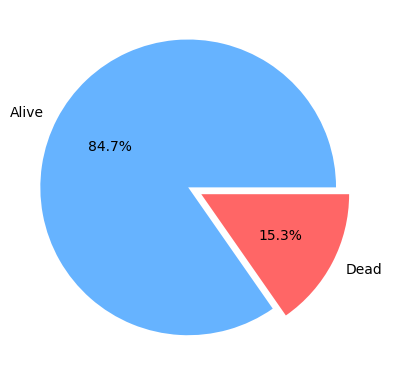

In [28]:
alive_counts = data['Status'].value_counts()
colors=['#66b3ff', '#ff6666']
plt.pie(alive_counts , labels=["Alive" , "Dead"]  , colors = colors , explode=(0.1,0), autopct='%1.1f%%')

# Transforming Data

In [30]:
data.dtypes

,0
Age,int64
Marital Status,object
T Stage,object
N Stage,object
Grade,object
A Stage,object
Tumor Size,int64
Estrogen Status,object
Progesterone Status,object
RNE,object


In [29]:
la= LabelEncoder()

In [33]:
obj = data.select_dtypes(include=('object'))
non_obj = data.select_dtypes(exclude=('object'))

In [35]:
for i in range(obj.shape[1]):
    col_name = obj.columns[i]
    obj[col_name] = la.fit_transform(obj[col_name])

In [36]:
obj

,Marital Status,T Stage,N Stage,Grade,A Stage,Estrogen Status,Progesterone Status,RNE,Status
0,1,0,0,3,1,1,1,0,0
1,1,1,1,2,1,1,1,0,0
2,0,2,2,2,1,1,1,0,0
3,1,0,0,3,1,1,1,0,0
4,1,1,0,3,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
4019,1,0,0,2,1,1,1,0,0
4020,0,1,1,2,1,1,1,0,0
4021,1,1,0,2,1,1,0,0,0
4022,0,1,0,2,1,1,1,0,0


In [37]:
obj = obj.astype('int')

In [39]:
data = pd.concat([obj, non_obj], axis=1)


In [40]:
data

,Marital Status,T Stage,N Stage,Grade,A Stage,Estrogen Status,Progesterone Status,RNE,Status,Age,Tumor Size,Reginol Node Positive,Survival Months
0,1,0,0,3,1,1,1,0,0,68,4,1,60
1,1,1,1,2,1,1,1,0,0,50,35,5,62
2,0,2,2,2,1,1,1,0,0,58,63,7,75
3,1,0,0,3,1,1,1,0,0,58,18,1,84
4,1,1,0,3,1,1,1,0,0,47,41,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1,0,0,2,1,1,1,0,0,62,9,1,49
4020,0,1,1,2,1,1,1,0,0,56,46,8,69
4021,1,1,0,2,1,1,0,0,0,68,22,3,69
4022,0,1,0,2,1,1,1,0,0,58,44,1,72


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Marital Status         4024 non-null   int64
 1   T Stage                4024 non-null   int64
 2   N Stage                4024 non-null   int64
 3   Grade                  4024 non-null   int64
 4   A Stage                4024 non-null   int64
 5   Estrogen Status        4024 non-null   int64
 6   Progesterone Status    4024 non-null   int64
 7   RNE                    4024 non-null   int64
 8   Status                 4024 non-null   int64
 9   Age                    4024 non-null   int64
 10  Tumor Size             4024 non-null   int64
 11  Reginol Node Positive  4024 non-null   int64
 12  Survival Months        4024 non-null   int64
dtypes: int64(13)
memory usage: 408.8 KB


# Models

In [45]:
x=data.drop('Status' , axis=1)
y=data.Status

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=.2 , random_state=21)

In [51]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=GradientBoostingClassifier()
model4=XGBClassifier()
model5=SVC()

In [52]:
model1.fit(x_train , y_train)

LogisticRegression()

In [54]:
pre= model1.predict(x_test)
pre

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
print(classification_report(pre , y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       723
           1       0.54      0.76      0.63        82

    accuracy                           0.91       805
   macro avg       0.76      0.84      0.79       805
weighted avg       0.93      0.91      0.92       805

